<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Wan_histogram_with_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this code, we are now going to construct a mask and compute color histograms for the masked region only.**

First we need to mount our code with google drive.

In [9]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the package that we will use for the code.

In [10]:
# Import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

On Line 1 we deﬁne plot_histogram. This function accepts three parameters: an image, the title of our plot and a mask. The mask defaults to None if we do not have a mask for the image.

The body of our plot_histogram function simply computes a histogram for each channel in the image and plots it.

In [11]:
def plot_histogram(image, title, mask = None):
	# Grab the image channels, initialize the tuple of colors
	# and the figure
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# Loop over the image channels
	for (chan, color) in zip(chans, colors):
		# Create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color = color)
		plt.xlim([0, 256])

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [4]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/corona.png"
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

Then, displaying the image on our screen and plot a histogram for each channel of the beach image on Line 4.

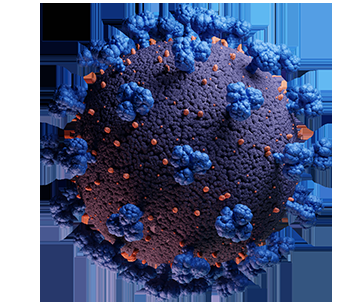

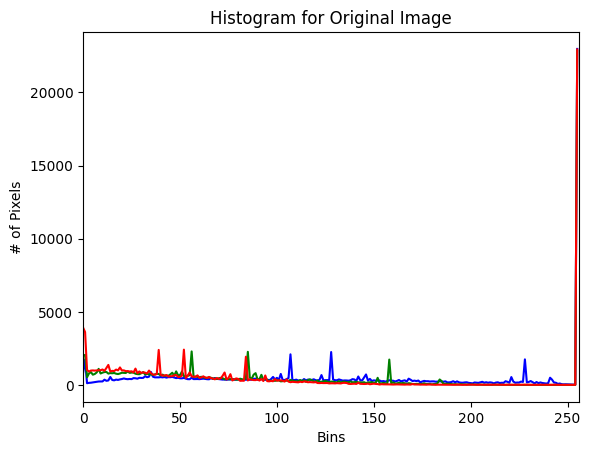

In [13]:
# Task 2
# Load the image and show it here :
image = cv2.imread(args["image"])

#Plot histogram
plot_histogram(image, "Histogram for Original Image")

cv2_imshow(image)

Now we are ready to construct a mask for the image. We deﬁne our mask as a NumPy array, with the same width and height as our beach image on Line 6. We then draw a white rectangle starting from point (15, 15) to point (130, 100) on Line 7. This rectangle will serve as our mask – only pixels in our original image belonging to the masked region will be considered in the histogram computation.

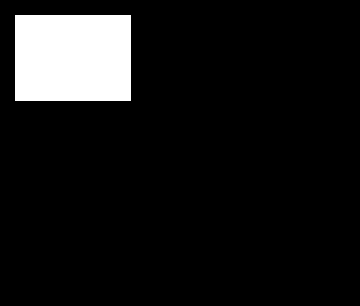

In [14]:
# Construct a mask for our image -- our mask will be BLACK for
# regions we want to IGNORE and WHITE for regions we want to
# EXAMINE. In this example we will be examining the foliage
# of the image, so we'll draw a white rectangle where the foliage
# is
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
# Task 3
# Show mask image here :
cv2_imshow(mask)

To visualize our mask, we apply a bitwise AND to the beach image (Line 2).

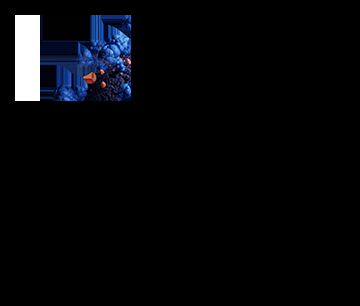

In [16]:
# What does masking our image look like?
# Task 4
# Apply bitwise_and and mask then show the image
masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)

Finally, we compute a histogram for our masked image using our plot_histogram function and show our results (Lines 3-6).

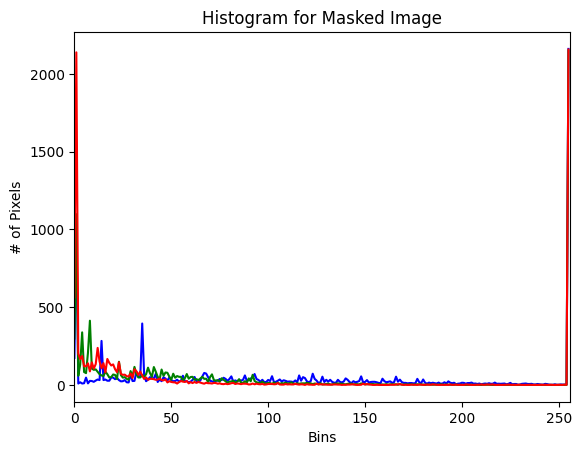

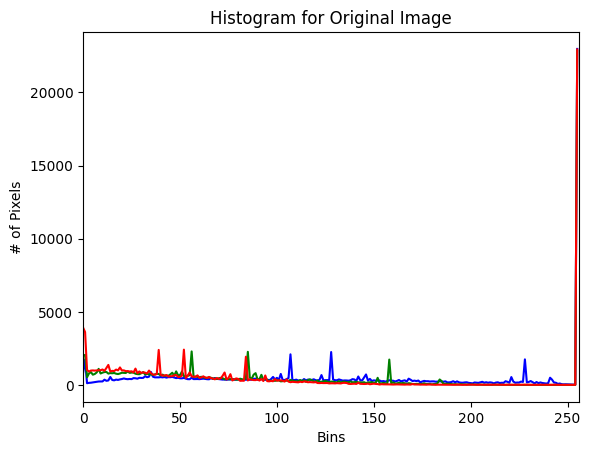

In [18]:
# Let's compute a histogram for our image, but we'll only include
# pixels in the masked region
plot_histogram(image, "Histogram for Masked Image", mask = mask)

# Task 5
# Show the plot here :
plot_histogram(image, "Histogram for Original Image")
